# Predict A Doctor's Consultation Fee 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the training and testing set
train_df = pd.read_excel("C:\\Users\\PUNEET SINGH\\Final_Train.xlsx")
print("Shape of the training set :",train_df.shape)

Shape of the training set : (5961, 7)


In [3]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
# Checking for the missing values in the data
na_values=train_df.isnull().sum()

In [5]:
na_percentage = train_df.isnull().sum()/len(train_df)
pd.concat([na_values,na_percentage],axis=1)

,0,1
Qualification,0,0.000000
Experience,0,0.000000
Rating,3302,0.553934
Place,25,0.004194
Profile,0,0.000000
Miscellaneous_Info,2620,0.439524
Fees,0,0.000000


In [6]:
# Checking the info of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
# Extract years of experience
train_df["Experience"] = train_df["Experience"].str.split()
train_df["Experience"] = train_df["Experience"].str[0].astype("int")

In [8]:
# Checking for the places in the data
train_df['Place'].value_counts()

HSR Layout, Bangalore               75
Andheri West, Mumbai                70
Dwarka, Delhi                       67
Banjara Hills, Hyderabad            64
Mulund West, Mumbai                 54
Borivali West, Mumbai               52
Kandivali West, Mumbai              50
Indiranagar, Bangalore              48
Whitefield, Bangalore               47
Malleswaram, Bangalore              47
Malad West, Mumbai                  47
Pitampura, Delhi                    45
Andheri East, Mumbai                43
Vileparle West, Mumbai              43
Powai, Mumbai                       42
Jubilee Hills, Hyderabad            40
Marathahalli, Bangalore             39
Bannerghatta Road, Bangalore        39
Bandra West, Mumbai                 38
Kondapur, Hyderabad                 38
Ghatkopar East, Mumbai              38
Secunderabad, Hyderabad             37
Rohini, Delhi                       37
Adyar, Chennai                      37
Janak Puri, Delhi                   37
Paschim Vihar, Delhi     

In [9]:
# Filling the missing value of the Feature Place by mode
train_df["Place"].fillna("Unknown,Unknown",inplace=True)
train_df['Place'].isnull().sum().any()

False

In [10]:
# Extracting Cities 
train_df["Place"] = train_df["Place"].str.split(",")
train_df["City"] = train_df["Place"].str[-1]
train_df["Place"] = train_df["Place"].str[0]

In [11]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [12]:
# # Seperate Ratings into bins
train_df["Rating"].fillna("-99%",inplace=True)
train_df["Rating"] = train_df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train_df["Rating"] = pd.cut(train_df["Rating"],bins=bins,labels=labels,include_lowest=True)
train_df["Rating"].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [13]:
# Extract relevant qualification
train_df["Qualification"]=train_df["Qualification"].str.split(",")
Qualification ={}
for x in train_df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [14]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    train_df[title]=0
    
for x,y in zip(train_df["Qualification"].values,np.array([idx for idx in range(len(train_df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            train_df[q][y] = 1
train_df.drop("Qualification",axis=1,inplace=True)

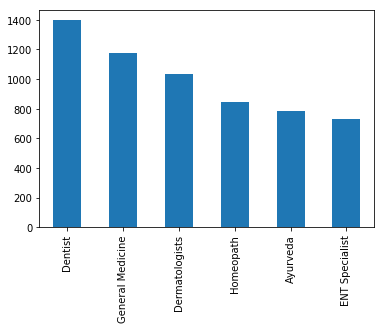

In [15]:
# Checking the value_counts of the Profile feature
train_df['Profile'].value_counts().plot.bar()

In [16]:
train_df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [17]:
# replace the e value in the feature City by Unknown
train_df["City"][3980] = "Unknown"
train_df["Place"][3980] = "Unknown"

In [18]:
# Dropping the Miscellaneous_Info feature as it doesnot provide much info and contains 50% missing values
train_df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [19]:
# Converting the categorical data into binary form through get_dummies
train_df = pd.get_dummies(train_df,columns=["City","Profile"],prefix=["City","Profile"])

In [20]:
train_df.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
train_df['Place'].nunique()

866

In [22]:
# Feature Place contains 866 unique value which is not possible not convert into binary form . 
# So can drop the feature and predict the rate on the basis of feature city
train_df.drop("Place",axis=1,inplace=True)

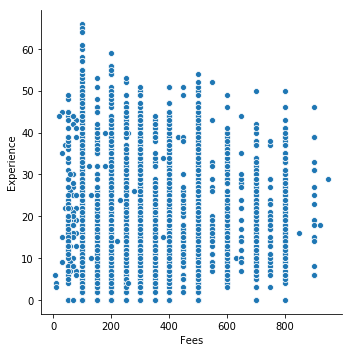

In [23]:
# Visualizing the data
sns.relplot(x='Fees',y='Experience',data=train_df)

In [24]:
# Experience do not have a linear relation wiht fees

In [25]:
# Dividing the independent and dependent variables
x = train_df.drop("Fees",axis=1)
y = train_df['Fees']

In [26]:
x.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# For encoding the class of the variables 
from sklearn.preprocessing import OrdinalEncoder

In [28]:
# Encoding
enc = OrdinalEncoder()
x = enc.fit_transform(x)

In [29]:
# splitting the data 
# Importing the library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [31]:
# Scaling the data
# Using StandardScaler
sc = StandardScaler()

In [32]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Importing the measure metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
# Function for the estimation of the score
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [36]:
dtc = DecisionTreeRegressor(max_depth=5)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
score(y_pred,y_test)*100

79.66091701027483

In [37]:
# Decision tree has predicted 79.66% accuracy

In [38]:
# Using svm
svr = SVR(gamma="scale")
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
# Prediction
y_pred = svr.predict(x_test)
score(y_pred,y_test)*100

79.9004966091726

 SVM model has predicted accuracy of 79.90% which is better than Decision tree which has predicted 79.66%

In [41]:
# Random forest
rf = RandomForestRegressor(n_estimators=30,max_depth=5)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
# Prediction
y_pred = rf.predict(x_test)
score(y_pred,y_test)*100

79.78058184247112

In [43]:
# Random forest also predicted the accuracy of 74.10 % which is less than our SVM model
# Hypertuning of the svm model through Gridsearchcv
# Importing the library
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(svr,param_grid=parameters,scoring='r2',n_jobs=-1,cv=5)

In [46]:
reg.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [47]:
reg.best_params_

{'C': 10, 'kernel': 'rbf'}

Refitting the best Parameters from the HyperParameters

In [48]:
svr = SVR(C=10,kernel='rbf')
svr.fit(x_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
# Prediction
y_pred = svr.predict(x_test)
score(y_pred,y_test)*100

81.23163431140338

We can see that after Using the HyperParameterTuning on Support Vector Machine , accuracy of the model has increased from 79.90 to 81.23% which is good ! 

In [50]:
# OUR SVM MODEL HAS PREDICTED BETTER THAN OTHER MODELS
# APPLYING Boosting MODELS 
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor(base_estimator=rf ,n_estimators=30)
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=30,
         random_state=None)

In [51]:
# Prediction
y_pred = ad.predict(x_test)
score(y_pred,y_test)*100

77.7991665545152

In [52]:
# FROM ALL THE MODEL ACCURACY SCORE
# SVM MODEL IS SELECTED FOR THE PREDICTION

In [53]:
# Saving the SUPPORT VECTOR Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_33.obj","wb")
# saving the model in pickel string
saved_sv_model = pickle.dump(svr,filehandler)
filehandler.close()